In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [19]:
import os
import time
import numpy as np
import pandas as pd

from os import listdir
from io import BytesIO
import requests

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,utils
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from scipy import stats
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import PIL
from PIL import Image

import seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [20]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [34]:
DATA_DIR = 'data/caps_and_shoes_squared/'
IMAGE_SIZE = (28,28)
FEATURE_SIZE = IMAGE_SIZE[0]*IMAGE_SIZE[1]

In [22]:
def convert_img_to_data(image):
    data = np.asarray(image)
    gs_image = image.convert(mode='L')
    gs_data = np.asarray(gs_image)
    gs_image.thumbnail(IMAGE_SIZE, Image.ANTIALIAS)
    gs_resized = gs_image.resize(IMAGE_SIZE,Image.ANTIALIAS)
    gs_resized_data = np.asarray(gs_resized)
    reshaped_gs_data = gs_resized_data.reshape(IMAGE_SIZE[0]*IMAGE_SIZE[1])
    return reshaped_gs_data

def convert_images_from_dir(dir_path):
    image_data = []
    
    for filename in listdir(dir_path):
        image = Image.open(dir_path +os.sep + filename)
        reshaped_gs_data = convert_img_to_data(image)
        image_data.append(reshaped_gs_data)
    
    return image_data

def load_from_dir(dir_path, labels):
    label_data = []
    image_data = []
    for label in labels:
        data_from_dir = convert_images_from_dir(dir_path + label)
        labels_for_data = [label for i in range(len(data_from_dir))]
        image_data += data_from_dir
        label_data += labels_for_data
    
    print('Found %d images belonging to %d classes' % (len(image_data),  len(labels)))
    return (np.array(image_data),np.array(label_data))

def load_img_data(data_dir):
    train_dir = DATA_DIR + 'train/'
    validation_dir = DATA_DIR + 'val/'
    test_dir = DATA_DIR + 'test/'
    
    if (os.path.isdir(train_dir) and os.path.isdir(validation_dir) and os.path.isdir(test_dir)) :
        labels = [subdirname.name for subdirname in os.scandir(train_dir) if subdirname.is_dir()] 
        
        train_data = load_from_dir(train_dir,labels)
        validation_data = load_from_dir(validation_dir,labels)
        test_data = load_from_dir(test_dir,labels)
        
    return train_data, validation_data, test_data

In [23]:
train_data, validation_data, test_data = load_img_data(DATA_DIR)
X_train, y_train = train_data
X_val, y_val = validation_data
X_test, y_test = test_data

Found 2299 images belonging to 2 classes
Found 678 images belonging to 2 classes
Found 327 images belonging to 2 classes


In [24]:
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [25]:
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

In [26]:
def define_multilayer_model_architecture_64_32_16():
    model = models.Sequential()
    model.add(Dense(64, activation='relu', input_shape=(FEATURE_SIZE,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [27]:
model = define_multilayer_model_architecture_64_32_16()
%time history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=500, batch_size=32, shuffle=True, verbose = 1)

Train on 2299 samples, validate on 678 samples
Epoch 1/500
2299/2299 [==============================] - 0s 121us/sample - loss: 0.6709 - accuracy: 0.5920 - val_loss: 0.6401 - val_accuracy: 0.6578
Epoch 2/500
2299/2299 [==============================] - 0s 54us/sample - loss: 0.6251 - accuracy: 0.6725 - val_loss: 0.6068 - val_accuracy: 0.6593
Epoch 3/500
2299/2299 [==============================] - 0s 52us/sample - loss: 0.5930 - accuracy: 0.6812 - val_loss: 0.5685 - val_accuracy: 0.7065
Epoch 4/500
2299/2299 [==============================] - 0s 56us/sample - loss: 0.5692 - accuracy: 0.7134 - val_loss: 0.5747 - val_accuracy: 0.7021
Epoch 5/500
2299/2299 [==============================] - 0s 49us/sample - loss: 0.5595 - accuracy: 0.7129 - val_loss: 0.5293 - val_accuracy: 0.7330
Epoch 6/500
2299/2299 [==============================] - 0s 50us/sample - loss: 0.5452 - accuracy: 0.7216 - val_loss: 0.5280 - val_accuracy: 0.7493
Epoch 7/500
2299/2299 [==============================] - 0s 50us

Epoch 56/500
2299/2299 [==============================] - 0s 53us/sample - loss: 0.2854 - accuracy: 0.8786 - val_loss: 0.5427 - val_accuracy: 0.7404
Epoch 57/500
2299/2299 [==============================] - 0s 54us/sample - loss: 0.3093 - accuracy: 0.8652 - val_loss: 0.3857 - val_accuracy: 0.8112
Epoch 58/500
2299/2299 [==============================] - 0s 55us/sample - loss: 0.2803 - accuracy: 0.8786 - val_loss: 0.3503 - val_accuracy: 0.8451
Epoch 59/500
2299/2299 [==============================] - 0s 56us/sample - loss: 0.2964 - accuracy: 0.8704 - val_loss: 0.3744 - val_accuracy: 0.8496
Epoch 60/500
2299/2299 [==============================] - 0s 53us/sample - loss: 0.2847 - accuracy: 0.8756 - val_loss: 0.3435 - val_accuracy: 0.8422
Epoch 61/500
2299/2299 [==============================] - 0s 56us/sample - loss: 0.2957 - accuracy: 0.8712 - val_loss: 0.4993 - val_accuracy: 0.7876
Epoch 62/500
2299/2299 [==============================] - 0s 53us/sample - loss: 0.2951 - accuracy: 0.8660

Epoch 111/500
2299/2299 [==============================] - 0s 57us/sample - loss: 0.1538 - accuracy: 0.9369 - val_loss: 0.4153 - val_accuracy: 0.8584
Epoch 112/500
2299/2299 [==============================] - 0s 55us/sample - loss: 0.1865 - accuracy: 0.9256 - val_loss: 0.4333 - val_accuracy: 0.8481
Epoch 113/500
2299/2299 [==============================] - 0s 56us/sample - loss: 0.1694 - accuracy: 0.9239 - val_loss: 0.4778 - val_accuracy: 0.8392
Epoch 114/500
2299/2299 [==============================] - ETA: 0s - loss: 0.1423 - accuracy: 0.93 - 0s 53us/sample - loss: 0.1729 - accuracy: 0.9208 - val_loss: 0.3974 - val_accuracy: 0.8673
Epoch 115/500
2299/2299 [==============================] - 0s 52us/sample - loss: 0.1576 - accuracy: 0.9378 - val_loss: 0.4044 - val_accuracy: 0.8732
Epoch 116/500
2299/2299 [==============================] - 0s 64us/sample - loss: 0.1560 - accuracy: 0.9330 - val_loss: 0.4024 - val_accuracy: 0.8717
Epoch 117/500
2299/2299 [==============================] -

Epoch 220/500
2299/2299 [==============================] - 0s 53us/sample - loss: 0.0852 - accuracy: 0.9591 - val_loss: 0.5026 - val_accuracy: 0.8776
Epoch 221/500
2299/2299 [==============================] - 0s 51us/sample - loss: 0.1601 - accuracy: 0.9430 - val_loss: 0.4879 - val_accuracy: 0.8628
Epoch 222/500
2299/2299 [==============================] - 0s 51us/sample - loss: 0.0892 - accuracy: 0.9648 - val_loss: 0.4748 - val_accuracy: 0.8732
Epoch 223/500
2299/2299 [==============================] - 0s 51us/sample - loss: 0.0997 - accuracy: 0.9556 - val_loss: 0.5134 - val_accuracy: 0.8466
Epoch 224/500
2299/2299 [==============================] - 0s 45us/sample - loss: 0.0887 - accuracy: 0.9582 - val_loss: 0.4734 - val_accuracy: 0.8687
Epoch 225/500
2299/2299 [==============================] - 0s 44us/sample - loss: 0.0716 - accuracy: 0.9691 - val_loss: 0.5296 - val_accuracy: 0.8702
Epoch 226/500
2299/2299 [==============================] - 0s 46us/sample - loss: 0.2696 - accuracy:

Epoch 329/500
2299/2299 [==============================] - 0s 50us/sample - loss: 0.0537 - accuracy: 0.9774 - val_loss: 0.6296 - val_accuracy: 0.8392
Epoch 330/500
2299/2299 [==============================] - 0s 50us/sample - loss: 0.0608 - accuracy: 0.9735 - val_loss: 0.5650 - val_accuracy: 0.8643
Epoch 331/500
2299/2299 [==============================] - 0s 50us/sample - loss: 0.0524 - accuracy: 0.9787 - val_loss: 0.5699 - val_accuracy: 0.8540
Epoch 332/500
2299/2299 [==============================] - 0s 52us/sample - loss: 0.0519 - accuracy: 0.9778 - val_loss: 0.5508 - val_accuracy: 0.8687
Epoch 333/500
2299/2299 [==============================] - 0s 50us/sample - loss: 0.0584 - accuracy: 0.9778 - val_loss: 0.7306 - val_accuracy: 0.8171
Epoch 334/500
2299/2299 [==============================] - 0s 51us/sample - loss: 0.2695 - accuracy: 0.9165 - val_loss: 0.5777 - val_accuracy: 0.8245
Epoch 335/500
2299/2299 [==============================] - 0s 47us/sample - loss: 0.0773 - accuracy:

Epoch 438/500
2299/2299 [==============================] - 0s 57us/sample - loss: 0.0475 - accuracy: 0.9796 - val_loss: 0.6565 - val_accuracy: 0.8555
Epoch 439/500
2299/2299 [==============================] - 0s 53us/sample - loss: 0.1023 - accuracy: 0.9717 - val_loss: 1.0898 - val_accuracy: 0.7965
Epoch 440/500
2299/2299 [==============================] - 0s 49us/sample - loss: 0.0788 - accuracy: 0.9722 - val_loss: 0.6231 - val_accuracy: 0.8732
Epoch 441/500
2299/2299 [==============================] - 0s 65us/sample - loss: 0.0345 - accuracy: 0.9856 - val_loss: 0.6477 - val_accuracy: 0.8628
Epoch 442/500
2299/2299 [==============================] - 0s 65us/sample - loss: 0.0369 - accuracy: 0.9861 - val_loss: 0.6392 - val_accuracy: 0.8525
Epoch 443/500
2299/2299 [==============================] - 0s 59us/sample - loss: 0.0405 - accuracy: 0.9830 - val_loss: 0.6783 - val_accuracy: 0.8702
Epoch 444/500
2299/2299 [==============================] - 0s 62us/sample - loss: 0.0441 - accuracy:

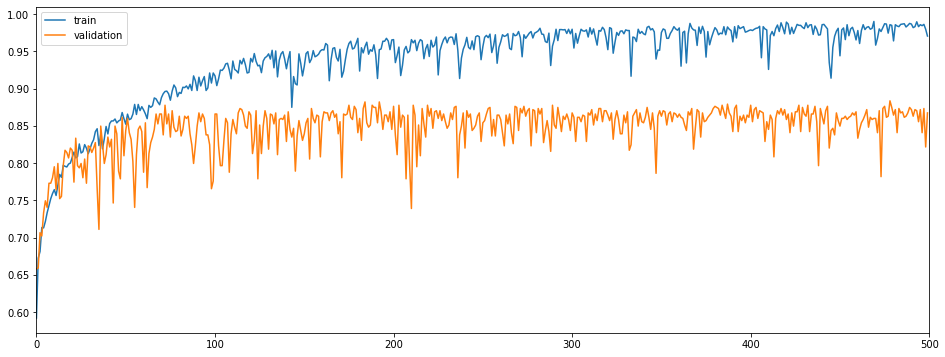

In [28]:
plt.figure(num=None, figsize=(16, 6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlim(0, 500)
plt.show()

In [49]:
ITER = 10
training_time_list = []
test_accuracy_list = []
for iter_count in range(ITER):
    model = define_multilayer_model_architecture_64_32_16()
    start_time = time.time()
    model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=250, batch_size=32, verbose=0, shuffle=True)
    training_time = time.time() - start_time
    training_time_list.append(training_time)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
    test_accuracy_list.append(test_accuracy)

print('Accuracies over 10 runs : %s' % test_accuracy_list)
print('Avg training time : %.3f s' % np.mean(training_time_list))
print('Avg test accuracy : %.4f +- %.2f' % (np.mean(test_accuracy_list), np.std(test_accuracy_list)))
print('Total parameters : %d' % model.count_params())

Accuracies over 10 runs : [0.82263, 0.87461776, 0.8287462, 0.8440367, 0.8287462, 0.8470948, 0.8562691, 0.8165138, 0.8501529, 0.853211]
Avg training time : 30.120 s
Avg test accuracy : 0.8422 +- 0.02
Total parameters : 52882


In [35]:
def define_multilayer_model_architecture_32_8():
    model = models.Sequential()
    model.add(Dense(32, activation='relu', input_shape=(FEATURE_SIZE,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [36]:
model = define_multilayer_model_architecture_32_8()
%time history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=500, batch_size=32, shuffle=True, verbose = 1)

Train on 2299 samples, validate on 678 samples
Epoch 1/500
2299/2299 [==============================] - 0s 113us/sample - loss: 0.6594 - accuracy: 0.6055 - val_loss: 0.6080 - val_accuracy: 0.6829
Epoch 2/500
2299/2299 [==============================] - 0s 49us/sample - loss: 0.5966 - accuracy: 0.6794 - val_loss: 0.5671 - val_accuracy: 0.7153
Epoch 3/500
2299/2299 [==============================] - 0s 50us/sample - loss: 0.5757 - accuracy: 0.7038 - val_loss: 0.5512 - val_accuracy: 0.7271
Epoch 4/500
2299/2299 [==============================] - 0s 49us/sample - loss: 0.5614 - accuracy: 0.7081 - val_loss: 0.5416 - val_accuracy: 0.7153
Epoch 5/500
2299/2299 [==============================] - 0s 50us/sample - loss: 0.5480 - accuracy: 0.7199 - val_loss: 0.5266 - val_accuracy: 0.7271
Epoch 6/500
2299/2299 [==============================] - 0s 49us/sample - loss: 0.5310 - accuracy: 0.7338 - val_loss: 0.5219 - val_accuracy: 0.7330
Epoch 7/500
2299/2299 [==============================] - 0s 52us

Epoch 56/500
2299/2299 [==============================] - 0s 60us/sample - loss: 0.3551 - accuracy: 0.8417 - val_loss: 0.4075 - val_accuracy: 0.7994
Epoch 57/500
2299/2299 [==============================] - 0s 61us/sample - loss: 0.3395 - accuracy: 0.8504 - val_loss: 0.3853 - val_accuracy: 0.8378
Epoch 58/500
2299/2299 [==============================] - 0s 73us/sample - loss: 0.3518 - accuracy: 0.8382 - val_loss: 0.4018 - val_accuracy: 0.8333
Epoch 59/500
2299/2299 [==============================] - 0s 74us/sample - loss: 0.3344 - accuracy: 0.8530 - val_loss: 0.3800 - val_accuracy: 0.8451
Epoch 60/500
2299/2299 [==============================] - 0s 66us/sample - loss: 0.3344 - accuracy: 0.8530 - val_loss: 0.3809 - val_accuracy: 0.8437
Epoch 61/500
2299/2299 [==============================] - 0s 57us/sample - loss: 0.3372 - accuracy: 0.8421 - val_loss: 0.3865 - val_accuracy: 0.8274
Epoch 62/500
2299/2299 [==============================] - 0s 62us/sample - loss: 0.3341 - accuracy: 0.8491

Epoch 111/500
2299/2299 [==============================] - 0s 56us/sample - loss: 0.2462 - accuracy: 0.9000 - val_loss: 0.3743 - val_accuracy: 0.8407
Epoch 112/500
2299/2299 [==============================] - 0s 48us/sample - loss: 0.2325 - accuracy: 0.9008 - val_loss: 0.3852 - val_accuracy: 0.8422
Epoch 113/500
2299/2299 [==============================] - 0s 48us/sample - loss: 0.2677 - accuracy: 0.8808 - val_loss: 0.3921 - val_accuracy: 0.8333
Epoch 114/500
2299/2299 [==============================] - 0s 50us/sample - loss: 0.2609 - accuracy: 0.8852 - val_loss: 0.3740 - val_accuracy: 0.8422
Epoch 115/500
2299/2299 [==============================] - 0s 51us/sample - loss: 0.2327 - accuracy: 0.8973 - val_loss: 0.6006 - val_accuracy: 0.7168
Epoch 116/500
2299/2299 [==============================] - 0s 62us/sample - loss: 0.2472 - accuracy: 0.8960 - val_loss: 0.3839 - val_accuracy: 0.8230
Epoch 117/500
2299/2299 [==============================] - 0s 52us/sample - loss: 0.2386 - accuracy:

Epoch 220/500
2299/2299 [==============================] - 0s 67us/sample - loss: 0.0977 - accuracy: 0.9656 - val_loss: 0.5007 - val_accuracy: 0.8392
Epoch 221/500
2299/2299 [==============================] - 0s 70us/sample - loss: 0.1111 - accuracy: 0.9548 - val_loss: 0.4829 - val_accuracy: 0.8540
Epoch 222/500
2299/2299 [==============================] - 0s 66us/sample - loss: 0.1734 - accuracy: 0.9274 - val_loss: 0.9201 - val_accuracy: 0.7699
Epoch 223/500
2299/2299 [==============================] - 0s 61us/sample - loss: 0.1362 - accuracy: 0.9439 - val_loss: 0.4964 - val_accuracy: 0.8437
Epoch 224/500
2299/2299 [==============================] - 0s 67us/sample - loss: 0.1612 - accuracy: 0.9365 - val_loss: 0.4592 - val_accuracy: 0.8540
Epoch 225/500
2299/2299 [==============================] - 0s 72us/sample - loss: 0.1076 - accuracy: 0.9543 - val_loss: 0.5363 - val_accuracy: 0.8215
Epoch 226/500
2299/2299 [==============================] - 0s 60us/sample - loss: 0.1525 - accuracy:

Epoch 329/500
2299/2299 [==============================] - 0s 55us/sample - loss: 0.0881 - accuracy: 0.9678 - val_loss: 0.5742 - val_accuracy: 0.8333
Epoch 330/500
2299/2299 [==============================] - 0s 57us/sample - loss: 0.0674 - accuracy: 0.9748 - val_loss: 0.5577 - val_accuracy: 0.8555
Epoch 331/500
2299/2299 [==============================] - 0s 52us/sample - loss: 0.0705 - accuracy: 0.9722 - val_loss: 0.5965 - val_accuracy: 0.8451
Epoch 332/500
2299/2299 [==============================] - 0s 62us/sample - loss: 0.0655 - accuracy: 0.9787 - val_loss: 0.5623 - val_accuracy: 0.8422
Epoch 333/500
2299/2299 [==============================] - 0s 64us/sample - loss: 0.0697 - accuracy: 0.9700 - val_loss: 0.5381 - val_accuracy: 0.8569
Epoch 334/500
2299/2299 [==============================] - 0s 60us/sample - loss: 0.0665 - accuracy: 0.9739 - val_loss: 0.9385 - val_accuracy: 0.7861
Epoch 335/500
2299/2299 [==============================] - 0s 53us/sample - loss: 0.0850 - accuracy:

Epoch 438/500
2299/2299 [==============================] - 0s 71us/sample - loss: 0.1254 - accuracy: 0.9587 - val_loss: 0.6621 - val_accuracy: 0.8451
Epoch 439/500
2299/2299 [==============================] - 0s 64us/sample - loss: 0.0521 - accuracy: 0.9809 - val_loss: 0.6926 - val_accuracy: 0.8451
Epoch 440/500
2299/2299 [==============================] - 0s 60us/sample - loss: 0.0513 - accuracy: 0.9800 - val_loss: 0.6211 - val_accuracy: 0.8599
Epoch 441/500
2299/2299 [==============================] - 0s 58us/sample - loss: 0.0559 - accuracy: 0.9783 - val_loss: 0.6665 - val_accuracy: 0.8525
Epoch 442/500
2299/2299 [==============================] - 0s 52us/sample - loss: 0.0533 - accuracy: 0.9800 - val_loss: 0.6342 - val_accuracy: 0.8584
Epoch 443/500
2299/2299 [==============================] - 0s 51us/sample - loss: 0.0512 - accuracy: 0.9822 - val_loss: 0.6210 - val_accuracy: 0.8643
Epoch 444/500
2299/2299 [==============================] - 0s 50us/sample - loss: 0.0930 - accuracy:

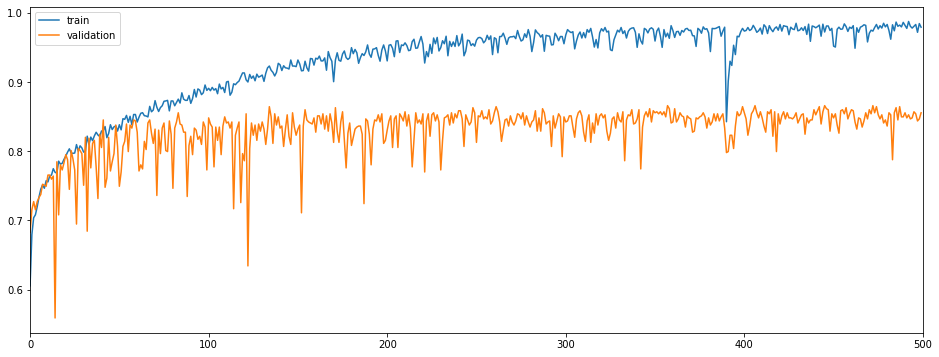

In [38]:
plt.figure(num=None, figsize=(16, 6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlim(0, 500)
plt.show()

In [39]:
ITER = 10
training_time_list = []
test_accuracy_list = []
for iter_count in range(ITER):
    model = define_multilayer_model_architecture_32_8()
    start_time = time.time()
    model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=250, batch_size=32, verbose=0, shuffle=True)
    training_time = time.time() - start_time
    training_time_list.append(training_time)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
    test_accuracy_list.append(test_accuracy)

print('Accuracies over 10 runs : %s' % test_accuracy_list)
print('Avg training time : %.3f s' % np.mean(training_time_list))
print('Avg test accuracy : %.4f +- %.2f' % (np.mean(test_accuracy_list), np.std(test_accuracy_list)))
print('Total parameters : %d' % model.count_params())

Accuracies over 10 runs : [0.8409786, 0.8318043, 0.82568806, 0.82263, 0.7461774, 0.82568806, 0.8318043, 0.8379205, 0.8409786, 0.8348624]
Avg training time : 26.210 s
Avg test accuracy : 0.8239 +- 0.03
Total parameters : 25402


In [44]:
model = define_multilayer_model_architecture_64_32_16()
%time history = model.fit(X_train, y_train, validation_split = 0.2, epochs=225, batch_size=32, shuffle=True, verbose = 0)

CPU times: user 25.6 s, sys: 992 ms, total: 26.6 s
Wall time: 18.9 s


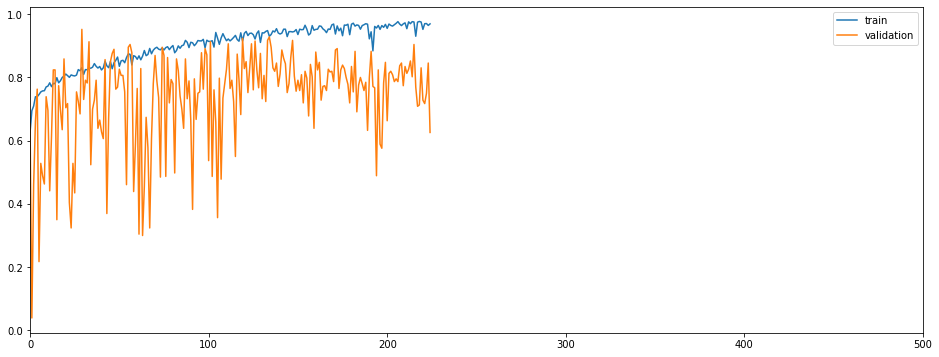

In [45]:
plt.figure(num=None, figsize=(16, 6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlim(0, 500)
plt.show()

In [46]:
model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=50, batch_size=32, shuffle=True, verbose = 2)

Train on 2299 samples, validate on 678 samples
Epoch 1/50
2299/2299 - 0s - loss: 0.3427 - accuracy: 0.8756 - val_loss: 0.4275 - val_accuracy: 0.8304
Epoch 2/50
2299/2299 - 0s - loss: 0.2265 - accuracy: 0.9126 - val_loss: 0.5323 - val_accuracy: 0.8053
Epoch 3/50
2299/2299 - 0s - loss: 0.2190 - accuracy: 0.9187 - val_loss: 0.4795 - val_accuracy: 0.8569
Epoch 4/50
2299/2299 - 0s - loss: 0.2434 - accuracy: 0.9182 - val_loss: 0.4293 - val_accuracy: 0.8451
Epoch 5/50
2299/2299 - 0s - loss: 0.2115 - accuracy: 0.9156 - val_loss: 0.4339 - val_accuracy: 0.8289
Epoch 6/50
2299/2299 - 0s - loss: 0.1836 - accuracy: 0.9274 - val_loss: 0.3957 - val_accuracy: 0.8643
Epoch 7/50
2299/2299 - 0s - loss: 0.2023 - accuracy: 0.9239 - val_loss: 0.4330 - val_accuracy: 0.8304
Epoch 8/50
2299/2299 - 0s - loss: 0.1566 - accuracy: 0.9395 - val_loss: 0.4713 - val_accuracy: 0.8304
Epoch 9/50
2299/2299 - 0s - loss: 0.1550 - accuracy: 0.9321 - val_loss: 0.6474 - val_accuracy: 0.7670
Epoch 10/50
2299/2299 - 0s - loss: 

In [47]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32) 
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

327/327 [==============================] - 0s 98us/sample - loss: 0.4706 - accuracy: 0.8532
Test loss: 0.4706 accuracy: 0.8532


In [50]:
ITER = 10
training_time_list = []
test_accuracy_list = []
for iter_count in range(ITER):
    model = define_multilayer_model_architecture_64_32_16()
    start_time = time.time()
    model.fit(X_train, y_train, validation_split = 0.2, epochs=200, batch_size=32, shuffle=True, verbose = 0)
    model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=100, batch_size=32, verbose=0, shuffle=True)
    training_time = time.time() - start_time
    training_time_list.append(training_time)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
    test_accuracy_list.append(test_accuracy)
    print('iter # %d : %.3f'%(iter_count+1,test_accuracy))

print('Accuracies over 10 runs : %s' % test_accuracy_list)
print('Avg training time : %.3f s' % np.mean(training_time_list))
print('Avg test accuracy : %.4f +- %.2f' % (np.mean(test_accuracy_list), np.std(test_accuracy_list)))
print('Total parameters : %d' % model.count_params())

iter # 1 : 0.841
iter # 2 : 0.859
iter # 3 : 0.859
iter # 4 : 0.844
iter # 5 : 0.841
iter # 6 : 0.847
iter # 7 : 0.832
iter # 8 : 0.850
iter # 9 : 0.850
iter # 10 : 0.853
Accuracies over 10 runs : [0.8409786, 0.8593272, 0.8593272, 0.8440367, 0.8409786, 0.8470948, 0.8318043, 0.8501529, 0.8501529, 0.853211]
Avg training time : 32.623 s
Avg test accuracy : 0.8477 +- 0.01
Total parameters : 52882
